In [1]:
# read reflacx dataset

import os, math, datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from data.constants import SPREADSHEET_FOLDER

In [2]:
# define paths 
physio_file_path = "E:\\physionet.org\\files\\"


# plotting functions
float_num_to_k = lambda num: f"{(float(num)/ 1e+3):.0f}K"

def plot_hist(series, ylabel, color, title=None,figsize=(10, 5),  top_n = None):
    plt.figure(figsize=figsize)

    elements = series.value_counts().sort_values()

    if not top_n is None:
        elements = elements[-1*top_n:]
        

    ax = elements.plot(kind="barh", color=color)

    ax.set_xlabel("Frequency", fontdict={"size": 16, "family": "serif"}, labelpad=15)
    ax.set_ylabel(
        ylabel, fontdict={"size": 16, "family": "serif"}, labelpad=15,
    )

    if not title is None:
        ax.set_title(
            title,
            fontdict={"size": 16, "weight": "bold", "family": "serif"},
            pad=15,
        )

    # tick labels
    ax.set_yticklabels(ax.get_yticklabels() , fontdict={"size": 13, "family": "serif"})

    ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={
        "size":13,
        'family': 'serif'
    })

    return ax


def time_string_to_float(x):
    return float('inf') if type(x) is float and math.isnan(x) else float(x.replace("-", "").replace("/", "").replace(" ", "").replace(":", ""))

def fill_time(time_flaot): 
    zero_in_front_times = 5 - int(np.log10(time_flaot))
    return "0"*zero_in_front_times + str(time_flaot)

def get_datetime_from_float(float_time):
    str_time = str(int(float_time))
    return datetime.datetime(
        year=int(str_time[:4]),
        month=int(str_time[4:6]),
        day=int(str_time[6:8]),
        hour=int(str_time[8:10]),
        minute=int(str_time[8:10]),
        second= int(str_time[12:14]),
    )


# Pharmacy

In [3]:
pharmacy_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\pharmacy.csv.gz")
)
pharmacy_df.head(5)

c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (16,18,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,10000032,22595853,11700683,10000032-34,2180-05-07 01:00:00,2180-05-07 22:00:00,Acetaminophen,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
1,10000032,22595853,14779570,10000032-22,2180-05-07 00:00:00,2180-05-07 22:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Floor Stock Item,NaN
2,10000032,22595853,19796602,10000032-50,2180-05-08 08:00:00,2180-05-07 22:00:00,Furosemide,Unit Dose,Discontinued via patient discharge,2180-05-07 09:32:35,...,NaN,NaN,1.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
3,10000032,22595853,20256254,10000032-32,2180-05-07 01:00:00,2180-05-07 22:00:00,Raltegravir,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,2.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
4,10000032,22595853,28781051,10000032-27,2180-05-07 00:00:00,2180-05-07 22:00:00,Heparin,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN


In [4]:
pharmacy_df["medication"].value_counts()[:15]

Insulin                        652746
Sodium Chloride 0.9%  Flush    544828
Acetaminophen                  464077
Heparin                        425595
Potassium Chloride             399796
Furosemide                     342088
Docusate Sodium                299818
HYDROmorphone (Dilaudid)       290730
Senna                          254228
Metoprolol Tartrate            254111
Ondansetron                    220038
Vancomycin                     189662
Magnesium Sulfate              183281
Bisacodyl                      182296
Aspirin                        153635
Name: medication, dtype: int64

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Medications in MIMIC-IV'}, xlabel='Frequency', ylabel='Medication'>

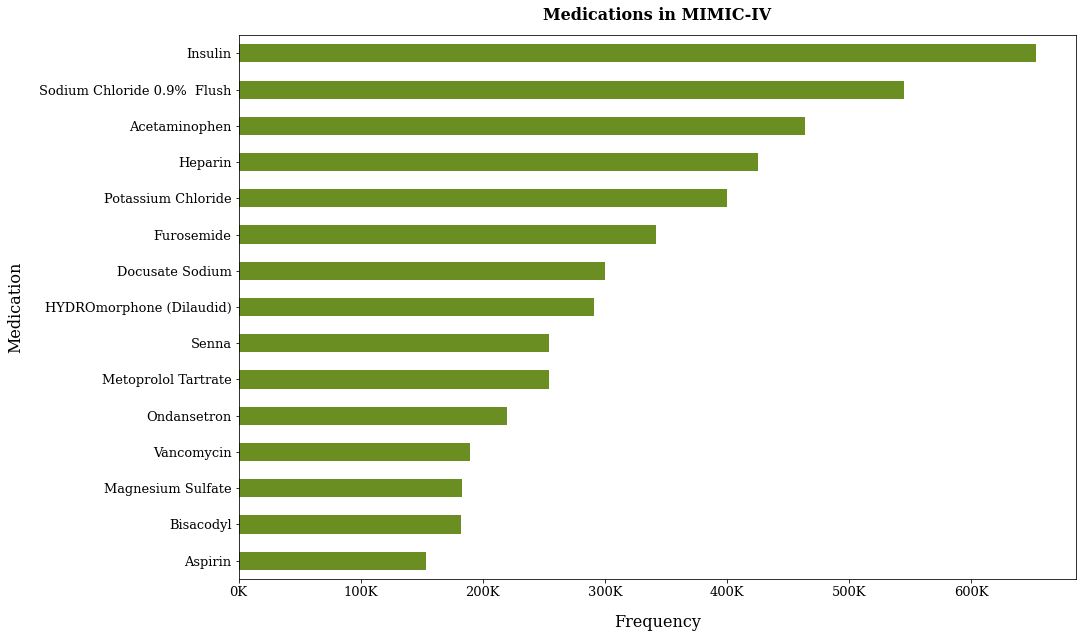

In [5]:
plot_hist(pharmacy_df["medication"], color="olivedrab", ylabel="Medication", title="Medications in MIMIC-IV", figsize=(15, 10), top_n=15)


## Diagnosis 

In [6]:
df_diagnosis = pd.read_csv(os.path.join( physio_file_path, "mimic-iv-ed\\2.0\\ed\\diagnosis.csv.gz"))
diagnoses_icd_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\diagnoses_icd.csv.gz")
)
d_icd_df = pd.read_csv(
    os.path.join(physio_file_path, "mimiciv\\2.0\\hosp\\d_icd_diagnoses.csv.gz")
)


# prepare the diagnosing dictionary.
icd_dict = {
    9:{},
    10: {},
}

for idx, i in d_icd_df.iterrows():
    icd_dict[i['icd_version']][i['icd_code']] = i['long_title']

# get titles
diagnoses_icd_df["long_title"] = diagnoses_icd_df.apply(lambda i:  icd_dict[i['icd_version']][i['icd_code']], axis=1)

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Diagnosis in MIMIC-IV'}, xlabel='Frequency', ylabel='Diagnosis'>

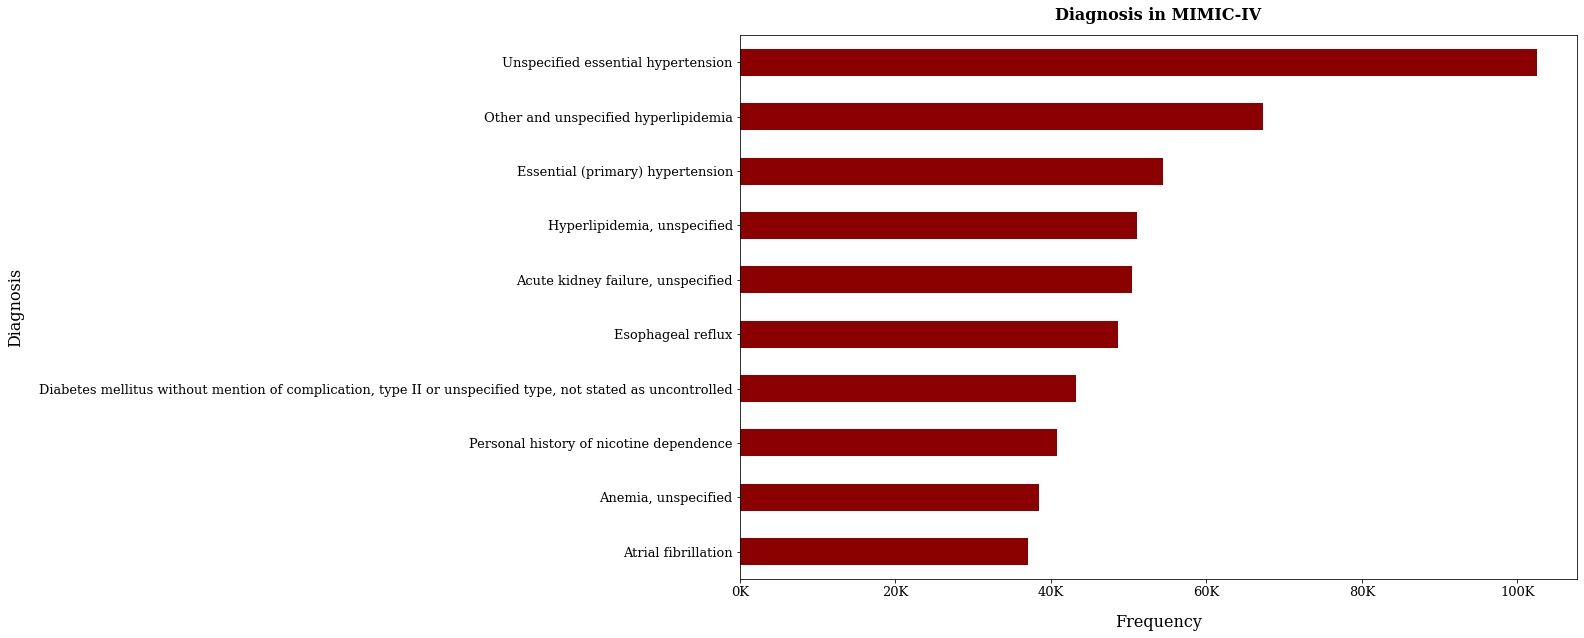

In [7]:
# diagnoses_icd_df["long_title"].value_counts().sort_values()[-5:].plot(kind="barh", color="r")
plot_hist(diagnoses_icd_df["long_title"], color="darkred", ylabel="Diagnosis", title="Diagnosis in MIMIC-IV", figsize=(15, 10), top_n=10)

# Load each meta df

In [8]:
# get the time obj for admission table and calculate the duration for each case.
patient_df = pd.read_csv(os.path.join( physio_file_path, "mimiciv\\2.0\\hosp\\patients.csv.gz"))
admissions_df = pd.read_csv(os.path.join( physio_file_path, "mimiciv\\2.0\\hosp\\admissions.csv.gz"))
admissions_df['admittime_obj'] = admissions_df['admittime'].apply(lambda x: get_datetime_from_float(time_string_to_float(x)))
admissions_df['dischtime_obj'] = admissions_df['dischtime'].apply(lambda x: get_datetime_from_float(time_string_to_float(x)))
admissions_df['duration'] = admissions_df.apply(lambda i: (i.dischtime_obj - i.admittime_obj).days, axis=1)

In [9]:
less_than_one_d = admissions_df['duration'].value_counts()[0]
print(f"{less_than_one_d} ({less_than_one_d/len(admissions_df)*100:.2f}%) instances has the duration less than one day.")

102418 (22.54%) instances has the duration less than one day.


In [10]:
less_than_five_d = admissions_df['duration'].value_counts()[:5].sum()
print(f"And, {less_than_five_d} ({less_than_five_d/len(admissions_df)*100:.2f}%) instances stayed less than 5 days")

And, 332838 (73.26%) instances stayed less than 5 days


In [11]:
more_than_50 = len(admissions_df[admissions_df['duration'] > 50])
print(f"Only have {more_than_50} ({more_than_50 / len(admissions_df)*100:.2f}%) instance stayed longer than 50 days while the maximum stay duration is {admissions_df['duration'].max()} days.")

Only have 1222 (0.27%) instance stayed longer than 50 days while the maximum stay duration is 295 days.


C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/293085784.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


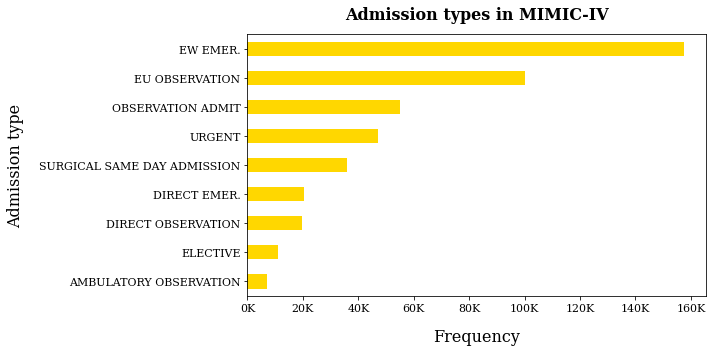

In [12]:
plt.figure(figsize=(10, 5))

ax = admissions_df['admission_type'].value_counts().sort_values().plot(kind="barh", color="gold")
ax.set_xlabel("Frequency", fontdict={"size": 16, "family": "serif"}, labelpad=15)
ax.set_ylabel(
    "Admission type", fontdict={"size": 16, "family": "serif"}, labelpad=15,
)

ax.set_title(
    "Admission types in MIMIC-IV",
    fontdict={"size": 16, "weight": "bold", "family": "serif"},
    pad=15,
)

# tick labels
ax.set_yticklabels(ax.get_yticklabels() , fontdict={"size": 11, "family": "serif"})

ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={
    "size":11,
    'family': 'serif'
})

plt.tight_layout()

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Marital status in MIMIC-IV'}, xlabel='Frequency', ylabel='Marital Status'>

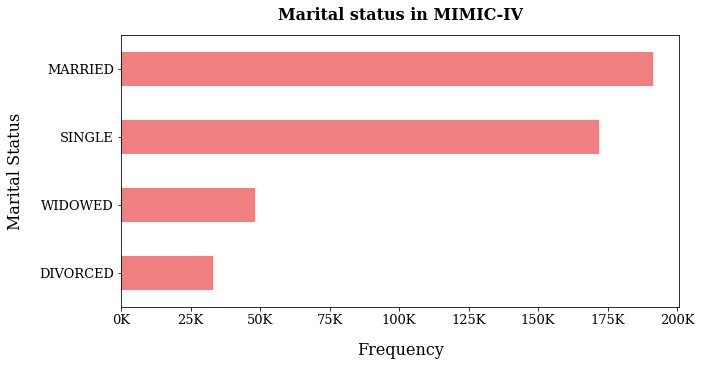

In [13]:
plot_hist(admissions_df.marital_status, color="lightcoral", ylabel="Marital Status", title="Marital status in MIMIC-IV",)

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Ethnicity in MIMIC-IV'}, xlabel='Frequency', ylabel='Ethnicity'>

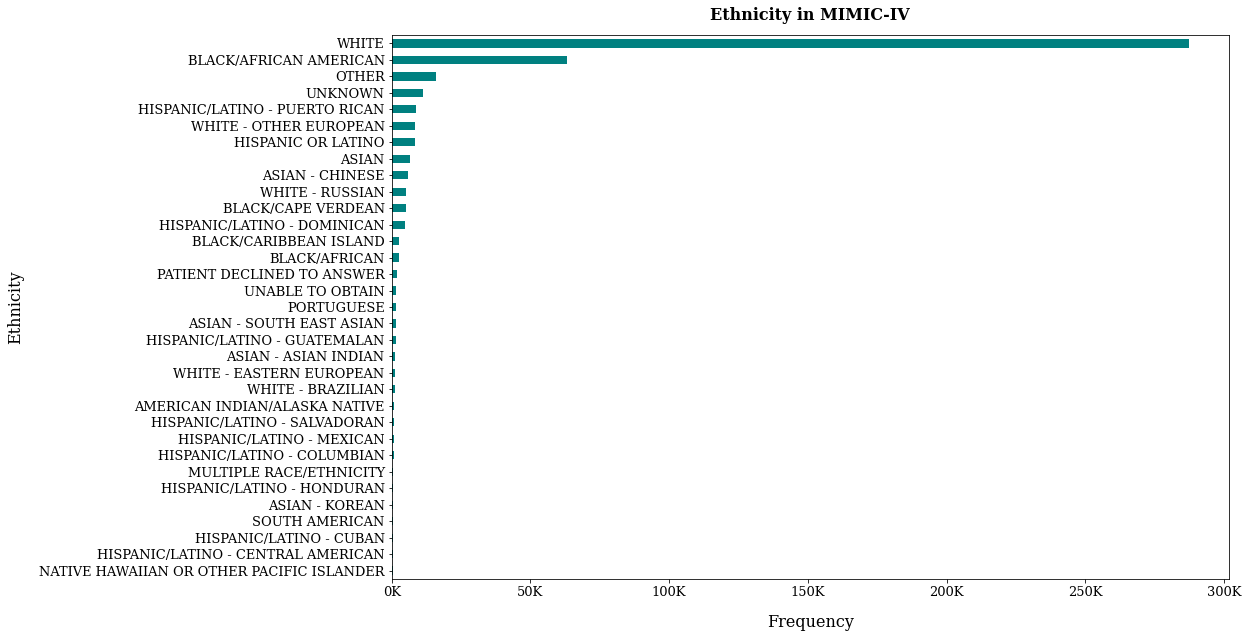

In [14]:
plot_hist(admissions_df.race, color="teal", ylabel="Ethnicity", title="Ethnicity in MIMIC-IV", figsize=(15, 10))

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Insurance type in MIMIC-IV'}, xlabel='Frequency', ylabel='Insurance'>

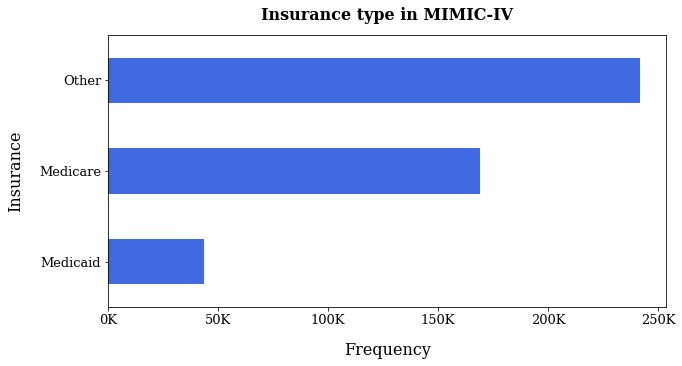

In [15]:
plot_hist(admissions_df.insurance, color="royalblue", ylabel="Insurance", title="Insurance type in MIMIC-IV", figsize=(10, 5))

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Language of patients in MIMIC-IV'}, xlabel='Frequency', ylabel='Language'>

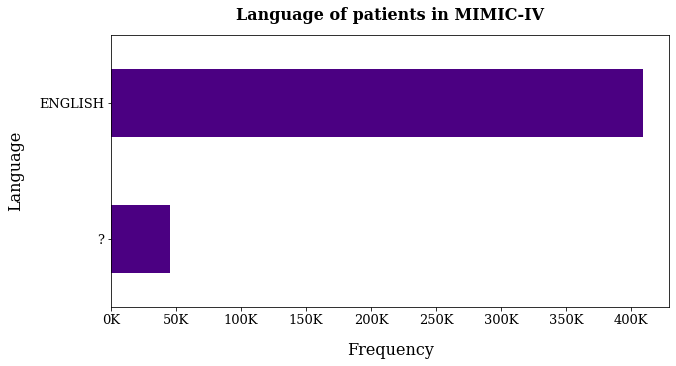

In [16]:
plot_hist(admissions_df.language, color="indigo", ylabel="Language", title="Language of patients in MIMIC-IV", figsize=(10, 5))

In [17]:
def plot_vhist(series, xlabel, color, bins=10, title=None, figsize=(10, 5),  xlim= None, x_ticklabel=False):
    plt.figure(figsize=figsize)

    if not xlim is None:
        plt.xlim([0, 50])
        

    ax = series.plot(kind="hist", bins=bins, color=color)

    ax.set_xlabel(xlabel, fontdict={"size": 16, "family": "serif"}, labelpad=15)
    ax.set_ylabel(
        "Frequency", fontdict={"size": 16, "family": "serif"}, labelpad=15,
    )

    if not title is None:
        ax.set_title(
            title,
            fontdict={"size": 16, "weight": "bold", "family": "serif"},
            pad=15,
        )

    if x_ticklabel:
        ax.set_xticklabels(ax.get_xticklabels(), fontdict={"size": 13, "family": "serif"})
    else:  
        ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()] , fontdict={"size": 13, "family": "serif"})

    ax.set_yticklabels( [ float_num_to_k(n) for n in list(ax.get_yticks())], fontdict={
        "size":13,
        'family': 'serif'
    })

    return ax

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/929792664.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()] , fontdict={"size": 13, "family": "serif"})
C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/929792664.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [ float_num_to_k(n) for n in list(ax.get_yticks())], fontdict={


<AxesSubplot:xlabel='Stay Duration (Days)', ylabel='Frequency'>

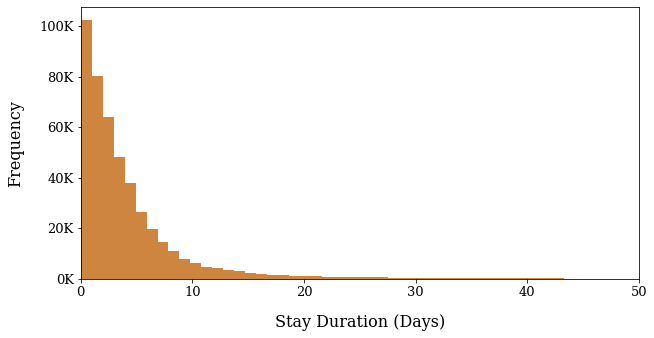

In [18]:
plot_vhist(admissions_df[admissions_df['duration'] >=
 0]['duration'], "Stay Duration (Days)", "peru", 300, title=None, figsize=(10, 5), xlim= [0, 50])

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/929792664.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()] , fontdict={"size": 13, "family": "serif"})
C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/929792664.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [ float_num_to_k(n) for n in list(ax.get_yticks())], fontdict={


<AxesSubplot:xlabel='Age demographics in MIMIC-IV', ylabel='Frequency'>

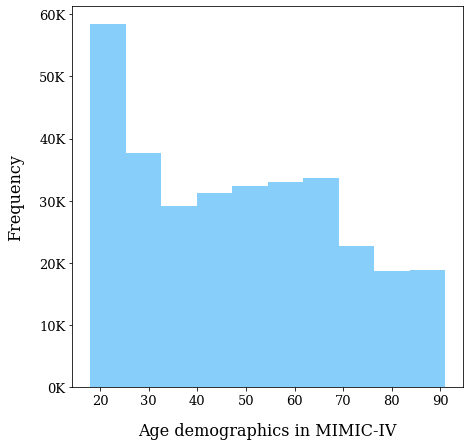

In [21]:
plot_vhist(patient_df["anchor_age"], "Age demographics in MIMIC-IV", "lightskyblue", title=None, figsize=(7, 7))

C:\Users\mike8\AppData\Local\Temp/ipykernel_9580/4062975107.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [ float_num_to_k(n) for n in list(ax.get_xticks())], fontdict={


<AxesSubplot:title={'center':'Gender demographics in MIMIC-IV'}, xlabel='Frequency', ylabel='Gender'>

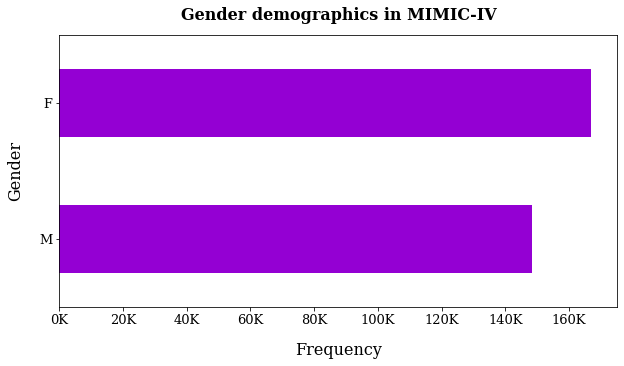

In [22]:
plot_hist(patient_df["gender"], title="Gender demographics in MIMIC-IV", color="darkviolet", ylabel="Gender")